In [1]:
import os, sys
sys.path.append("../")

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import gridspec
import numpy as np
from scipy.optimize import minimize
from scipy.stats import chi2
from tqdm import *

from grf.grf import FIRAS
from grf.units import *
from grf.pk_interp import PowerSpectrumGridInterpolator

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

# FIRAS data checks and plot

In [2]:
# Plot parameters

from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
# Where to save plots
plots_dir = "../paper/draft-letter/plots/"

## FIRAS data checks

In [4]:
pspec = PowerSpectrumGridInterpolator("nonlin_matter_bj")

In [5]:
firas = FIRAS(pspec)

../grf/grf.py:633: FutureWarning: read_table is deprecated, use read_csv instead.
  names=['freq', 'I', 'residual', 'uncert', 'poles'])


In [6]:
chi2_null = minimize(firas.chi2_FIRAS,x0=[2.725],args=(0, np.ones_like(firas.omega_FIRAS)), method='Powell')

In [7]:
chi2_null.x

array(2.72501704)

In [8]:
ndof = len(firas.d) - 1

print('chi2 is', chi2_null.fun)
print('chi2 / ndof is', chi2_null.fun / ndof)

chi2 is 48.19672388442093
chi2 / ndof is 1.147541044867165


In [9]:
chi2.ppf(q=0.95, df=ndof)

58.12403768086803

In [10]:
# Amazing!
(firas.d - firas.B_CMB(firas.omega_FIRAS, chi2_null.x)  / (1e6 * Jy)) * 1e3 / firas.resid

array([1.01859729, 1.01219083, 1.00665943, 0.96947179, 0.99214751,
       0.99333799, 1.01169952, 0.99478948, 0.97820668, 0.98441236,
       1.39763349, 0.95627042, 1.03539677, 0.931326  , 0.90965366,
       1.04189886, 0.91012744, 0.96399769, 0.94892646, 1.01679604,
       1.01600407, 0.99166357, 0.91752175, 1.1235758 , 0.91454281,
       1.02221851, 1.00215006, 0.99539556, 1.0102167 , 0.98502826,
       0.97942204, 0.92540096, 0.97359247, 1.01144426, 0.97696511,
       0.9837021 , 1.01099055, 0.94466418, 1.00737463, 0.98468032,
       1.00800534, 1.00442703, 1.00053248])

In [11]:
# Get disappearance probabilities for benchmark point
p1 = 1 - firas.P_tot_perturb(firas.omega_FIRAS, 6e-6, 4e-15 * eV)[2]

../grf/grf.py:170: RuntimeWarning: invalid value encountered in sqrt
  z_ary, self.omega(omega_0, z_ary, evolve_z))), nan=1e-18 * eV)
../grf/grf.py:176: RuntimeWarning: invalid value encountered in sqrt
  z, self.omega(omega_0, z, evolve_z))), nan=1e-18 * eV) - m_A
../grf/grf.py:366: RuntimeWarning: invalid value encountered in log
  sigma_LN_sq_ary / 2.) ** 2 / (2 * sigma_LN_sq_ary)) * (1. / (m_Ap ** 2 + (b - 1) * m_A_sq))
../grf/grf.py:369: RuntimeWarning: invalid value encountered in log
  ** 2 / (2 * sigma_LN_sq_ary)) / np.abs(self.dz_dt(z_mesh)) * (m_Ap ** 2 / (m_Ap ** 2 + (b - 1) * m_A_sq))


## FIRAS blackbody plot (Fig. 4)

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


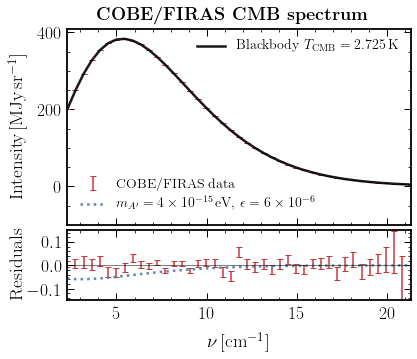

In [12]:
gs = gridspec.GridSpec(2, 1, height_ratios=[2.8, 1], hspace=0.04)

# Top plot

ax0 = plt.subplot(gs[0])

line2 = ax0.errorbar(firas.df['freq'], firas.d, yerr=firas.df['uncert'] / 1e3, c=cols_default[0], fmt='none', capsize=3, capthick=1, elinewidth=1.5, label='COBE/FIRAS data')
line1, = ax0.plot(firas.df['freq'], firas.B_CMB(firas.omega_FIRAS, chi2_null.x)   / (1e6 * Jy), c='k', ls='-', label='Blackbody $T_{\mathrm{CMB}} = 2.725\,\mathrm{K}$')

ax0.set_xlim(np.min(firas.df['freq']), np.max(firas.df['freq']))
ax0.set_ylim(-50, 420)

ax0.set_ylabel(r"Intensity\,[MJy\,sr$^{-1}$]")
line3, = ax0.plot([],[], c=cols_default[1], ls=':', label=r'$m_{A^\prime}=4\times 10^{-15}$\,eV, $\epsilon=6\times 10^{-6}$')

ax0.set_ylim(-100, 410)
first_legend = plt.legend(handles=[line1], loc='upper right', fontsize=14)

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2, line3], loc='lower left', fontsize=14, handlelength=1.8)

# Bottom plot

ax1 = plt.subplot(gs[1])

ax1.errorbar(firas.df['freq'], firas.d - firas.B_CMB(firas.omega_FIRAS, chi2_null.x)   / (1e6 * Jy), yerr=firas.df['uncert'] / 1e3, c=cols_default[0], fmt='none', capsize=3, capthick=1, elinewidth=1.5)
ax1.plot(firas.df['freq'], p1 * firas.B_CMB(firas.omega_FIRAS, chi2_null.x)   / (1e6 * Jy) - firas.B_CMB(firas.omega_FIRAS, chi2_null.x)   / (1e6 * Jy), c=cols_default[1], ls=':')
ax1.axhline(0., c='k', ls='-', lw=0.5)
ax1.set_xlim(np.min(firas.df['freq']), np.max(firas.df['freq']))
ax1.set_ylim(-0.15, 0.15)

ax1.set_ylabel("Residuals", labelpad=0.1)
ax1.set_xlabel(r"$\nu\,[\mathrm{cm}^{-1}]$")

plt.suptitle(r"\bf{COBE/FIRAS CMB spectrum}", y=0.94, fontsize=18)

plt.tight_layout()

plt.savefig(plots_dir + "firas_bb.pdf", bbox_inches='tight')